<a href="https://colab.research.google.com/github/DeepaManjunath/Assignment1/blob/master/conv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [6]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


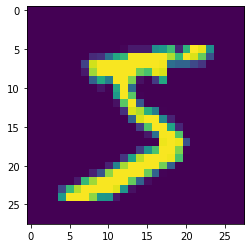

In [7]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [11]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [13]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [22]:
from keras.layers import Activation
model = Sequential()
 
model.add(Convolution2D(45,3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(10,3,activation='relu'))
model.add(Convolution2D(45,3,activation='relu'))
model.add(Convolution2D(10,3,activation='relu'))
model.add(Convolution2D(45,3,activation='relu'))
model.add(Convolution2D(10,3,activation='relu'))
model.add(Convolution2D(45,3,activation='relu'))
model.add(Convolution2D(10,3,activation='relu'))
model.add(Convolution2D(10,1,activation='relu'))
model.add(Convolution2D(10,12))
model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(45, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


In [23]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 45)        450       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 24, 24, 10)        4060      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 22, 22, 45)        4095      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 20, 20, 10)        4060      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 18, 18, 45)        4095      
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 10)        4060      
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 14, 14, 45)       

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:

model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Epoch 1/10
60000/60000 [==============================] - 344s 6ms/step - loss: 0.2084 - acc: 0.9353
Epoch 2/10
60000/60000 [==============================] - 339s 6ms/step - loss: 0.0881 - acc: 0.9743
Epoch 3/10
60000/60000 [==============================] - 340s 6ms/step - loss: 0.0687 - acc: 0.9796
Epoch 4/10
60000/60000 [==============================] - 343s 6ms/step - loss: 0.0557 - acc: 0.9834
Epoch 5/10
60000/60000 [==============================] - 343s 6ms/step - loss: 0.0490 - acc: 0.9847
Epoch 6/10
60000/60000 [==============================] - 346s 6ms/step - loss: 0.0446 - acc: 0.9858
Epoch 7/10
60000/60000 [==============================] - 346s 6ms/step - loss: 0.0397 - acc: 0.9878
Epoch 8/10
60000/60000 [==============================] - 345s 6ms/step - loss: 0.0353 - acc: 0.9886
Epoch 9/10
60000/60000 [==============================] - 350s 6ms/step - loss: 0.0326 - acc: 0.9894
Epoch 10/10
60000/60000 [==============================] - 366s 6ms/step - loss: 0.0287 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [30]:
print(score)

[0.04737444119657157, 0.9868]


In [0]:
y_pred = model.predict(X_test)

In [17]:
print(y_pred[:9])
print(y_test[:9])

[[0.08341956 0.06659372 0.08489501 0.11943645 0.09800287 0.07496635
  0.06769376 0.20230058 0.09447957 0.1082122 ]
 [0.10180271 0.10134228 0.1771645  0.1456307  0.05495465 0.10448939
  0.13220118 0.03414896 0.10892162 0.03934403]
 [0.08100603 0.18508835 0.09439962 0.10121917 0.08879402 0.07810582
  0.10176552 0.07754046 0.11486194 0.0772192 ]
 [0.2739094  0.03530928 0.11921267 0.08688229 0.06715875 0.07096203
  0.14605713 0.06434168 0.0735829  0.06258388]
 [0.10433307 0.03862574 0.15085173 0.07508825 0.16416094 0.06655216
  0.09721381 0.09988575 0.09160681 0.11168173]
 [0.07144507 0.20604111 0.08661132 0.10887898 0.09076648 0.07046234
  0.08513504 0.07718685 0.12538753 0.07808525]
 [0.07646055 0.0532923  0.08512136 0.11250362 0.16180342 0.09324528
  0.07995736 0.10170275 0.11343978 0.12247357]
 [0.08311524 0.07501917 0.107007   0.11946134 0.11847382 0.0849058
  0.11629407 0.07897625 0.10037667 0.11637063]
 [0.13100764 0.063514   0.2053001  0.05894412 0.11988763 0.06002409
  0.11807283 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in Sequential.layers])

In [19]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored